define data format

In [154]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## reading
read data from csv file

In [93]:
train_data_filename = 'emnist-balanced-train.csv'
test_data_filename = 'emnist-balanced-test.csv'
# train_data_filename = 'mnist_train.csv'
# test_data_filename = 'mnist_test.csv'
raw_train_data = np.genfromtxt('EMNIST_data/' + train_data_filename, delimiter=',')
raw_test_data = np.genfromtxt('EMNIST_data/' + test_data_filename, delimiter=',')
print('loaded', train_data_filename,'with size', raw_train_data.shape)
print('loaded', test_data_filename,'with size', raw_test_data.shape)

loaded emnist-balanced-train.csv with size (112800, 785)
loaded emnist-balanced-test.csv with size (18800, 785)


read mapping file

In [131]:
mapping_filename = 'EMNIST_data/emnist-balanced-mapping.txt'
mapper = {}
with open(mapping_filename) as f:
    m = map(str.split, f.readlines())
    for item in m:
        mapper.update({int(item[0]): chr(int(item[1]))})

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


## loading
load data into numpy

In [102]:
classes = 47
eye = np.eye(classes)
train_images, train_labels = raw_train_data[:, 1:], eye[raw_train_data[:, :1].astype(int).ravel()]
test_images, test_labels = raw_test_data[:, 1:], eye[raw_test_data[:, :1].astype(int).ravel()]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(112800, 784)
(112800, 47)
(18800, 784)
(18800, 47)


## data visiualization

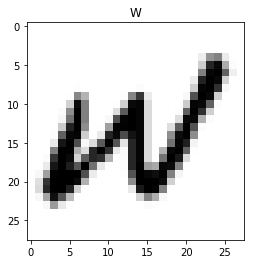

In [156]:
index = 69
img = train_images[index].reshape(28,28).T
plt.imshow(img,cmap='binary')
plt.title(mapper[np.argmax(train_labels[index])])
plt.show()

In [95]:
train_images/=255.0
test_images/=255.0

## modeling
create a simple linear model classifier

In [96]:
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,classes]))
b = tf.Variable(tf.zeros([classes]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [97]:
y_ = tf.placeholder("float", [None,classes])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

## training
using batch gradient decsent to train the model with 10000 iterations

0 171436.532081604
1 134310.13677978516
2 129457.3773651123
3 127078.35297393799
4 125536.20378112793
5 124456.66117858887
6 123549.10111236572
7 122823.87390899658
8 122211.05002593994
9 121605.37411499023
10 121220.35223770142
11 120723.26564025879
12 120249.70532226562
13 119914.88675689697
14 119571.16548538208
15 119283.29201507568
16 118911.09188461304
17 118705.4853477478
18 118366.167552948
19 118169.3616027832


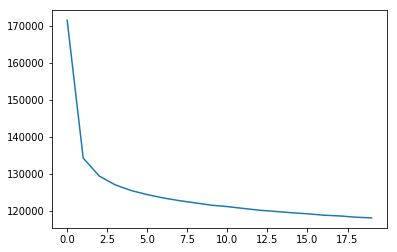

In [100]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size = 100
costs = []
for epoch in range(20):
    cost = 0
    p = np.arange(train_images.shape[0])
    np.random.shuffle(p)
    batch_length = np.ceil(train_images.shape[0] / batch_size).astype(int)
    for i in range(batch_length):
        d1 = i * batch_size
        d2 = min(d1 + batch_size, train_images.shape[0])
        d = sess.run([train_step, cross_entropy], feed_dict={
            x: train_images[p[d1 : d2]], 
            y_: train_labels[p[d1 : d2]]
        })
        cost += d[1]
    print(epoch, cost)
    costs.append(cost)
plt.plot(costs)

## evaluating

In [180]:
print('weight:', b.eval())
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy:', sess.run(accuracy, feed_dict={x: test_images, y_: test_labels}))

weight: [-0.46947724  1.6037275  -0.08545297 -1.0020635   0.4316465   0.9082067
 -1.4772007   0.6228108  -2.0648103  -0.53086    -0.8035661  -2.3209448
  0.8256338  -0.54083574 -1.5752604   0.7318085  -1.0118532  -0.2810854
  1.2429212   3.1096747  -0.03136913  3.3894243  -1.0809752   0.03063381
 -0.7097681  -0.22264795 -1.5687549  -1.651036    0.09656317  1.5846354
  0.01361937  1.0424963  -1.4419067  -1.0443856   1.971479   -0.48000363
 -0.77913713 -0.3347471  -0.3163237  -1.26707     0.1242533  -1.091927
  1.8379093   0.6057405  -1.3060633   1.0759891   2.15213   ]
accuracy: 0.6918617


## result visiualization

Model predicts N


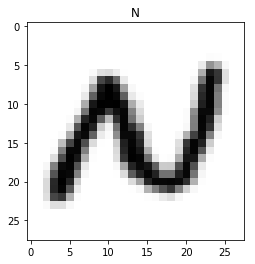

In [209]:
index = 8140
img = test_images[index].reshape(28,28).T
plt.imshow(img,cmap='binary')
plt.title(mapper[np.argmax(test_labels[index])])
prediction = tf.argmax(y, 1)
print('Model predicts', mapper[prediction.eval(feed_dict={x: test_images[index].reshape(1,784)})[0]])